
# Dataset- Rajshahi

### ML algorithm (Decision Tree Regressor)


In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization data
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("F:\CLASS\CSE498R(Directed Research)\Dataset\RajshahiNew\CombineRajshahiDataset.csv")

In [3]:
data.head()

D     T     TM     Tm      SLP      H    VV     V    VM    AQI  \
0  Jan-01  18.4  24.50  14.00  1011.80  81.00  5.60  3.30  5.40  285.0   
1       2  14.2  18.40  11.40  1012.10  88.00  4.30  5.00  7.60  285.0   
2       3  14.8  23.60  10.60  1012.80  71.00  5.00  4.10  7.60  391.0   
3       4  14.9  22.29   9.65  1013.11  80.82  4.94  2.74  5.85  261.0   
4       5  14.9  22.29   9.65  1013.11  80.82  4.94  2.74  5.85  219.0   

  Category  
0       VU  
1       VU  
2       EU  
3       VU  
4       VU

In [5]:
data.shape

(1007, 11)

In [6]:
data = data.drop(['D','Category'], axis = 1)
data

T     TM     Tm      SLP      H    VV     V    VM    AQI
0     18.40  24.50  14.00  1011.80  81.00  5.60  3.30  5.40  285.0
1     14.20  18.40  11.40  1012.10  88.00  4.30  5.00  7.60  285.0
2     14.80  23.60  10.60  1012.80  71.00  5.00  4.10  7.60  391.0
3     14.90  22.29   9.65  1013.11  80.82  4.94  2.74  5.85  261.0
4     14.90  22.29   9.65  1013.11  80.82  4.94  2.74  5.85  219.0
...     ...    ...    ...      ...    ...   ...   ...   ...    ...
1002  14.80  24.00   7.80  1013.60  75.00  5.30  1.30  5.40  295.0
1003  18.16  25.42  12.77  1014.86  78.31  4.89  1.95  5.29  333.0
1004  18.16  25.42  12.77  1014.86  78.31  4.89  1.95  5.29  397.0
1005  18.16  25.42  12.77  1014.86  78.31  4.89  1.95  5.29  288.0
1006  17.10  25.40  10.20  1015.50  67.00  5.60  3.00  7.60  208.0

[1007 rows x 9 columns]

In [7]:
data.isnull().sum()

T      0
TM     0
Tm     0
SLP    0
H      0
VV     0
V      0
VM     0
AQI    0
dtype: int64

<AxesSubplot:>

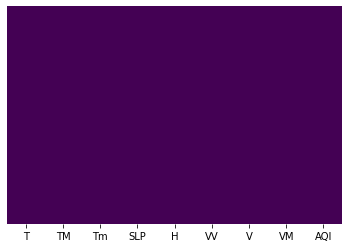

In [8]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Categorical Value Handling - (Label Encoding Method)

data['Category'].unique()

# Import Label Encoder 

from sklearn import preprocessing 

encode = preprocessing.LabelEncoder()
data['Category'] = encode.fit_transform(data['Category'])

data['Category'].unique()

data.head()

# Correalation Matrix

In [9]:
data.corr()

T        TM        Tm       SLP         H        VV         V  \
T    1.000000  0.953209  0.972471 -0.866961  0.188052  0.683842  0.364101   
TM   0.953209  1.000000  0.882336 -0.780737 -0.019022  0.753939  0.262301   
Tm   0.972471  0.882336  1.000000 -0.887879  0.377996  0.594192  0.382684   
SLP -0.866961 -0.780737 -0.887879  1.000000 -0.351717 -0.540844 -0.515137   
H    0.188052 -0.019022  0.377996 -0.351717  1.000000 -0.233558  0.115707   
VV   0.683842  0.753939  0.594192 -0.540844 -0.233558  1.000000  0.217333   
V    0.364101  0.262301  0.382684 -0.515137  0.115707  0.217333  1.000000   
VM   0.145800  0.097976  0.140092 -0.257461 -0.041456  0.071609  0.824576   
AQI -0.792248 -0.699872 -0.823161  0.740784 -0.344199 -0.508204 -0.442283   

           VM       AQI  
T    0.145800 -0.792248  
TM   0.097976 -0.699872  
Tm   0.140092 -0.823161  
SLP -0.257461  0.740784  
H   -0.041456 -0.344199  
VV   0.071609 -0.508204  
V    0.824576 -0.442283  
VM   1.000000 -0.220798  
AQI -0.220798  1.000000

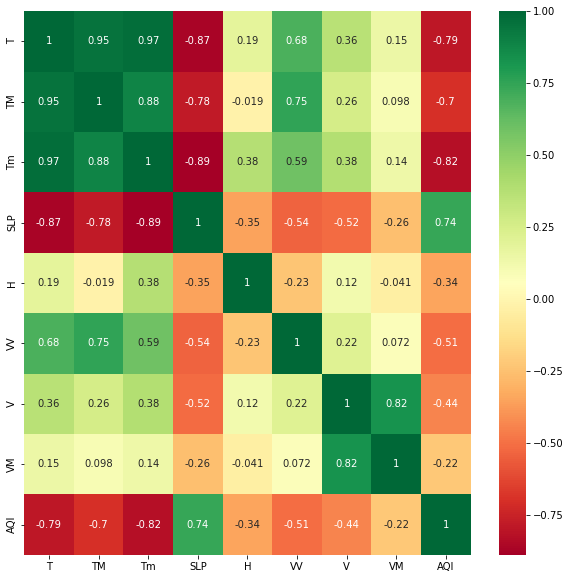

In [10]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
g = sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [11]:
X = data.iloc[:,:-1] ##independent features
y = data.iloc[:,-1]  ##dependent features

In [12]:
X.head()

T     TM     Tm      SLP      H    VV     V    VM
0  18.4  24.50  14.00  1011.80  81.00  5.60  3.30  5.40
1  14.2  18.40  11.40  1012.10  88.00  4.30  5.00  7.60
2  14.8  23.60  10.60  1012.80  71.00  5.00  4.10  7.60
3  14.9  22.29   9.65  1013.11  80.82  4.94  2.74  5.85
4  14.9  22.29   9.65  1013.11  80.82  4.94  2.74  5.85

In [13]:
y.head()

0    285.0
1    285.0
2    391.0
3    261.0
4    219.0
Name: AQI, dtype: float64

In [14]:
y.isnull().sum()

0

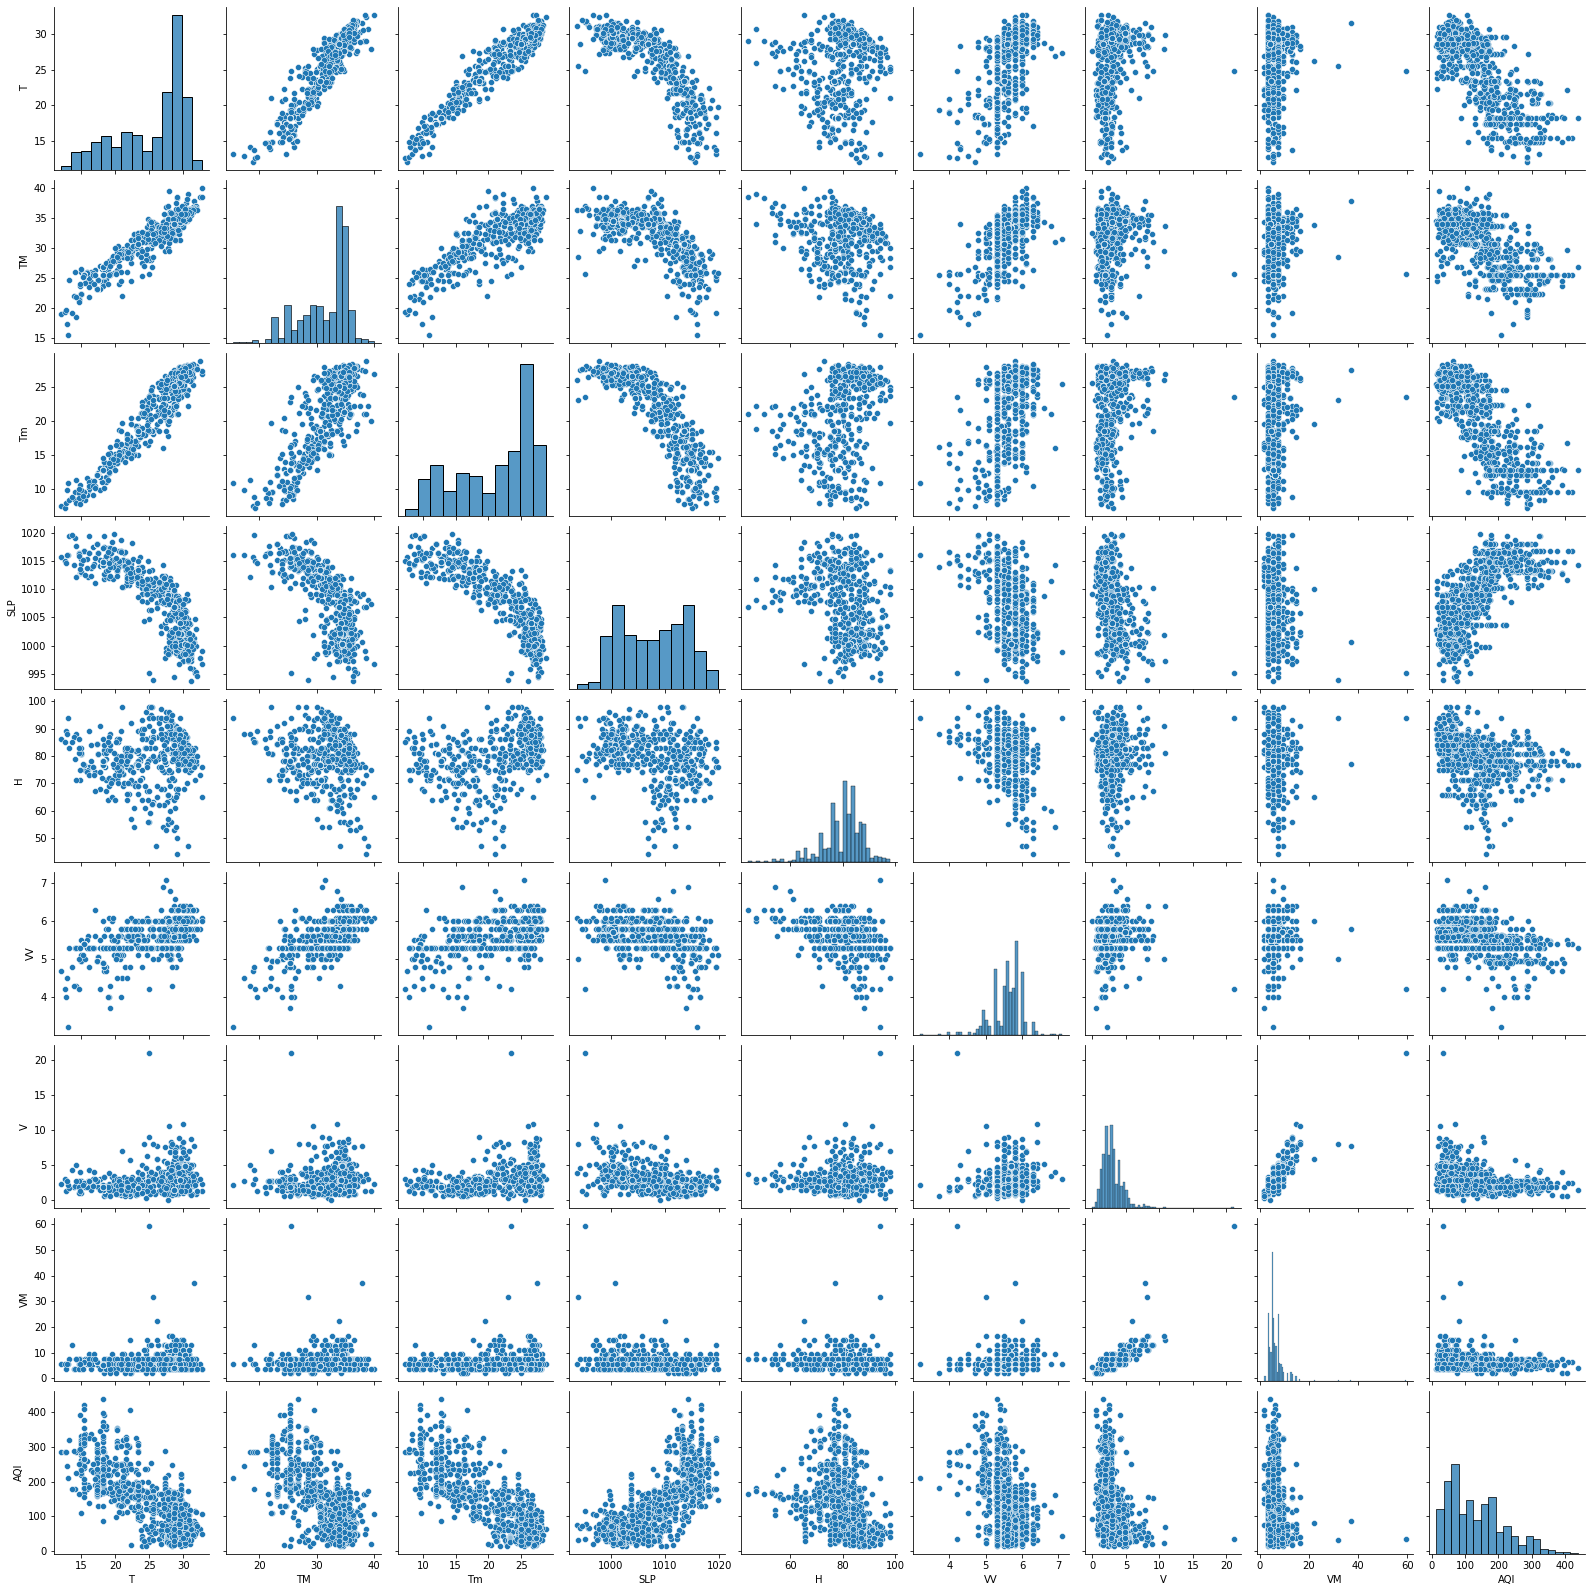

In [15]:
sns.pairplot(data)

# Feature Importance

We are using Extra Tree Regressor to find out top features from dataset.

In [16]:
from sklearn.ensemble import ExtraTreesRegressor

In [17]:
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [18]:
print(model.feature_importances_)

[0.19830893 0.08059513 0.41906748 0.18546217 0.03709842 0.02566265
 0.03230735 0.02149787]


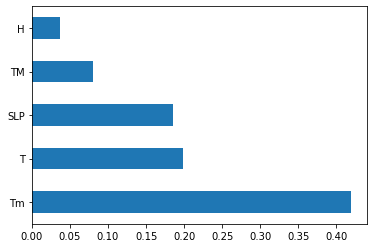

In [19]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

C:\Users\Rutton\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AQI', ylabel='Density'>

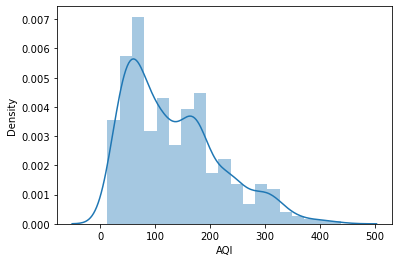

In [20]:
sns.distplot(y,kde=True)

# Train Test Split

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# M-4: Decision Tree

In [65]:
from sklearn.tree import DecisionTreeRegressor

In [66]:
dtree = DecisionTreeRegressor(criterion='mse')

In [67]:
dtree.fit(X,y)

DecisionTreeRegressor()

In [68]:
round(dtree.score(X_train,y_train)*100,2)

85.93

In [69]:
round(dtree.score(X_test,y_test)*100,2)

87.18

In [81]:
# Cross Validation

from sklearn.model_selection import cross_val_score
score = cross_val_score(dtree,X_train,y_train,cv=10)
score.mean()*100

66.86416528338773

# Tree Visualization

In [87]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus

In [88]:
features = list(data.columns[:-2])
features

['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V']

In [90]:
import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

In [92]:
dot_data = StringIO()
export_graphviz(dtree,out_file=dot_data,feature_names=None,filled=True,rounded=True)

graph= pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

# Model Evaluation

In [110]:
from sklearn import metrics
prediction=dtree.predict(X_test)

C:\Users\Rutton\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AQI', ylabel='Density'>

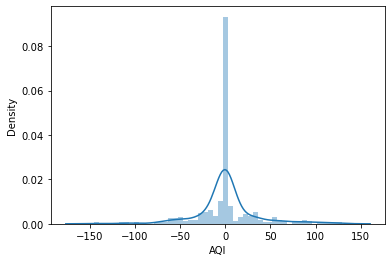

In [111]:
sns.distplot(y_test-prediction,kde=True)

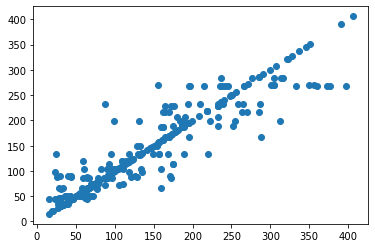

In [113]:
plt.scatter(y_test,prediction)

In [114]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 17.415671495094376
MSE: 1067.2331748712104
RMSE: 32.66853493610037


# Hyperparameter Tuning

In [98]:
DecisionTreeRegressor()

DecisionTreeRegressor()

In [99]:
#Hyper Parameter Optimization

params={   
    "splitter" : ["best","random"],
    "max_depth" : [3, 4, 5, 6, 8, 10, 12, 15],
    "min_samples_leaf" : [1, 2, 3, 4, 5],
    "min_weight_fraction_leaf" : [0.1, 0.2, 0.3, 0.4, 0.5],
    "max_features" : ["auto", "log2", "sqrt", None],
    "max_leaf_nodes" : [None, 10, 20, 30, 40, 50, 60, 70] 
}

In [100]:
#Hyparparameter optimization

from sklearn.model_selection import GridSearchCV

In [101]:
search=GridSearchCV(dtree,param_grid=params,scoring='r2',n_jobs=-1,cv=10,verbose=3)

In [102]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [103]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
search.fit(X_train,y_train)
timer(start_time) # timing ends here for "start_time" variable

Fitting 10 folds for each of 12800 candidates, totalling 128000 fits

 Time taken: 0 hours 2 minutes and 32.57 seconds.


In [104]:
search.best_params_

{'max_depth': 4,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [105]:
round(search.best_score_*100,2)

68.74

# Model Evaluation

In [108]:
predictions=search.predict(X_test)

In [109]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 38.273022230188076
MSE: 2617.5770092183516
RMSE: 51.16226157255318
